In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
from keras.utils import to_categorical

train_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Train"
test_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Test"
val_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Validation"

datagen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.5, 1.5)
)


train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'  
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)



test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)



Found 1440 images belonging to 10 classes.
Found 406 images belonging to 10 classes.
Found 202 images belonging to 10 classes.


In [5]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  
])


cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = cnn.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)



Epoch 1/30
45/45 [==============================] - 916s 20s/step - loss: 6.8281 - accuracy: 0.1326 - val_loss: 2.1933 - val_accuracy: 0.1429
Epoch 2/30
45/45 [==============================] - 167s 4s/step - loss: 2.2502 - accuracy: 0.1556 - val_loss: 2.2385 - val_accuracy: 0.1527
Epoch 3/30
45/45 [==============================] - 174s 4s/step - loss: 2.1093 - accuracy: 0.2375 - val_loss: 2.0569 - val_accuracy: 0.2808
Epoch 4/30
45/45 [==============================] - 166s 4s/step - loss: 1.8147 - accuracy: 0.3660 - val_loss: 1.8600 - val_accuracy: 0.3153
Epoch 5/30
45/45 [==============================] - 179s 4s/step - loss: 1.6302 - accuracy: 0.4528 - val_loss: 1.7313 - val_accuracy: 0.3867
Epoch 6/30
45/45 [==============================] - 164s 4s/step - loss: 1.5996 - accuracy: 0.4472 - val_loss: 1.5247 - val_accuracy: 0.4631
Epoch 7/30
45/45 [==============================] - 166s 4s/step - loss: 1.4578 - accuracy: 0.4979 - val_loss: 1.7227 - val_accuracy: 0.3892
Epoch 8/30
4

In [20]:
cnn.save('/content/drive/Shareddrives/yeni derin öğrenme ortak drive/CNNnormalveriseti9ocaksabah30epoch.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


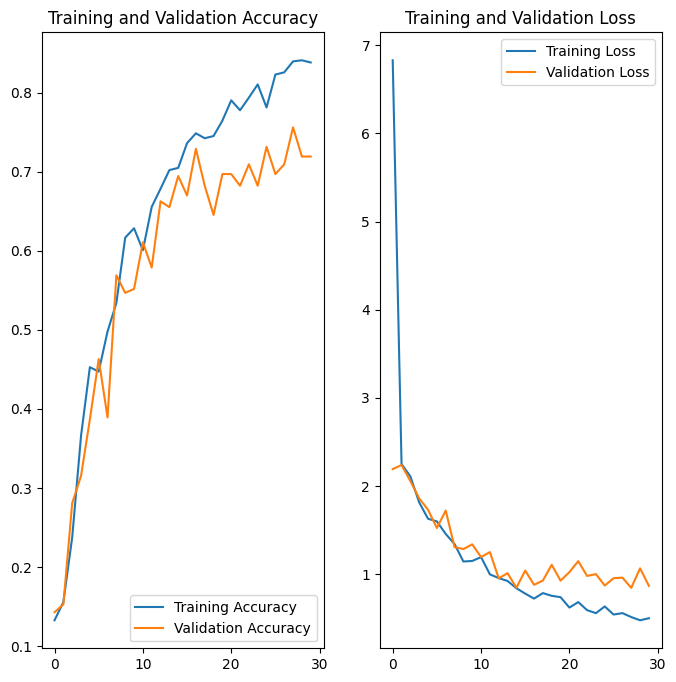

In [19]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


7/7 [==============================] - 16s 2s/step - loss: 1.0532 - accuracy: 0.7475
Test accuracy: 0.7475247383117676
7/7 [==============================] - 21s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.91      0.95      0.93        21
           2       0.48      0.70      0.57        20
           3       0.53      0.86      0.65        21
           4       0.38      0.25      0.30        20
           5       0.90      0.78      0.84        23
           6       0.74      0.81      0.77        21
           7       0.46      0.40      0.43        15
           8       1.00      0.70      0.82        20
           9       0.69      0.52      0.59        21

    accuracy                           0.68       202
   macro avg       0.69      0.67      0.67       202
weighted avg       0.70      0.68      0.68       202



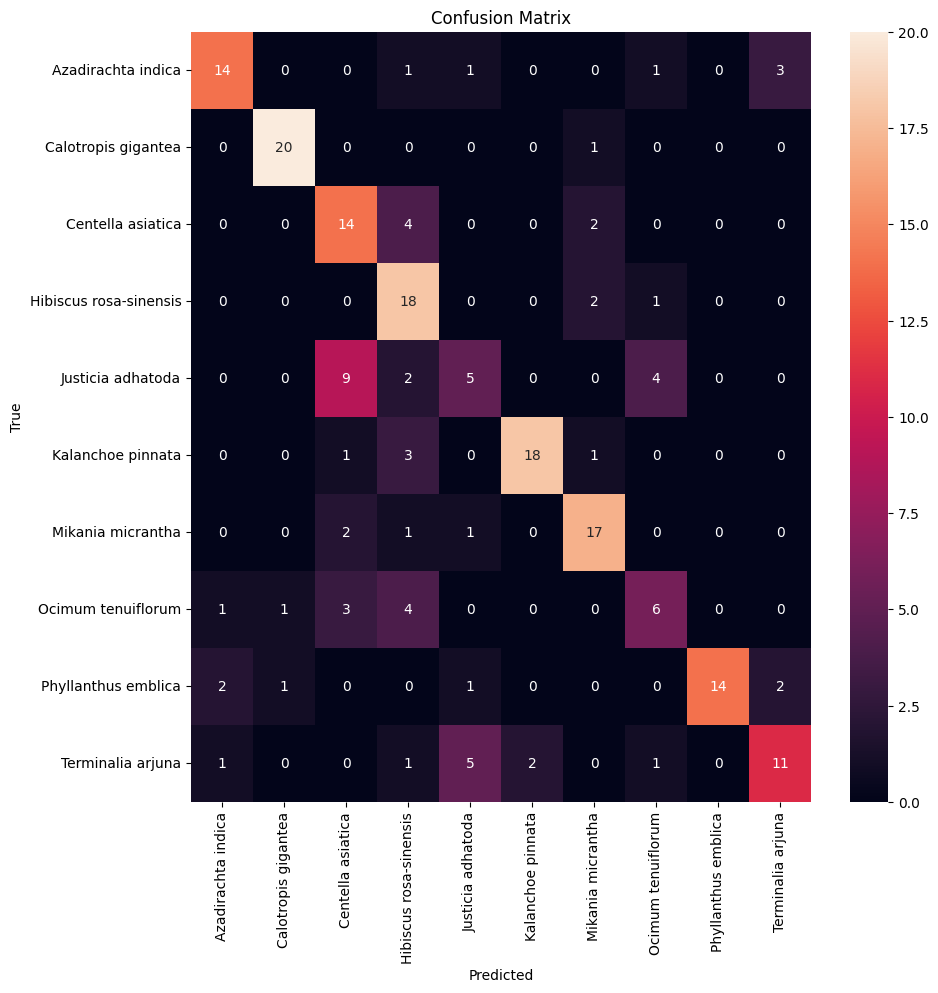

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from keras.utils import to_categorical




test_loss, test_acc = cnn.evaluate(test_generator)
print('Test accuracy:', test_acc)


y_pred = cnn.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()